# 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Importing Dataset

In [2]:
from astropy.io import fits
hdul = fits.open('combined_data.fits')

In [3]:
data = hdul[1].data

subclass =[]
for data_point in data:
    if data_point[-8]== 'STARFORMING' or data_point[-8]=='AGN':
        subclass.append(data_point[-8])
    else:
        pass

a = r_mag_list =[]
b = g_mag_list =[]
c = u_mag_list =[]
d = i_mag_list =[]
e = z_mag_list =[]

for data_point in data:
    if data_point[-8]=='STARFORMING' or data_point[-8]=='AGN':
        a.append(data_point[-31])
        b.append(data_point[-32])
        c.append(data_point[-33])
        d.append(data_point[-30])
        e.append(data_point[-29])
    else:
        pass

u_g = []
zip_object = zip(c, b)
for u, g in zip_object:
    u_g.append(u - g)
f = u_g

g_r = []
zip_object = zip(b, a)
for g, r in zip_object:
    g_r.append(g - r)
h = g_r

r_i = []
zip_object = zip(a, d)
for r, i in zip_object:
    r_i.append(r - i)
j = r_i

i_z = []
zip_object = zip(d, e)
for i, z in zip_object:
    i_z.append(i - z)
k = i_z

In [4]:
len(data)

2866856

# 3. Preparing Data For Training

In [5]:
import pandas as pd
from pandas import DataFrame
X =   DataFrame([f, h, j, k]).transpose()
X.columns=['u-g', 'g-r', 'r-i', 'i-z']
print('len_X=', len(X))

y = pd.DataFrame(subclass)
y.columns=['SPEC_SUBCLASS']
print('len_y=', len(y))

len_X= 19819
len_y= 19819


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('ytrain=', len(y_train))
print('ytest=', len(y_test))

ytrain= 17837
ytest= 1982


In [7]:
y_train['SPEC_SUBCLASS'].value_counts()

STARFORMING    11310
AGN             6527
Name: SPEC_SUBCLASS, dtype: int64

In [8]:
y_test['SPEC_SUBCLASS'].value_counts()

STARFORMING    1241
AGN             741
Name: SPEC_SUBCLASS, dtype: int64

# 4. Feature Scaling

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Training the Algorithm

In [73]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print('ypred=', len(y_pred))

C:\Users\27719\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ypred= 1982


In [74]:
pred = pd.DataFrame(y_pred)
pred.columns=['y_pred']
pred['y_pred'].value_counts()

STARFORMING    1260
AGN             722
Name: y_pred, dtype: int64

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 611  130]
 [ 111 1130]]
              precision    recall  f1-score   support

         AGN       0.85      0.82      0.84       741
 STARFORMING       0.90      0.91      0.90      1241

    accuracy                           0.88      1982
   macro avg       0.87      0.87      0.87      1982
weighted avg       0.88      0.88      0.88      1982

0.8784056508577195


# After classification

In [43]:
dataset = pd.DataFrame({'u-g': X_test[:, 0], 'g-r': X_test[:, 1], 'r-i': X_test[:, 2], 'i-z': X_test[:, 3]})
pred = pd.DataFrame(y_pred)
pred.columns=['y_pred']
after_classification = pd.concat([dataset, pred], axis=1)
after_classification

,u-g,g-r,r-i,i-z,y_pred
0,0.297137,-0.953452,-0.921437,0.653608,STARFORMING
1,0.822161,-0.013181,0.523479,0.280174,STARFORMING
2,-0.999293,-0.425129,-0.182243,-0.108898,STARFORMING
3,-0.219599,-0.602088,-0.408328,-0.316996,STARFORMING
4,-1.024166,-1.291111,-1.398860,-0.699294,STARFORMING
...,...,...,...,...,...
1977,-0.225904,-0.350199,0.420306,0.166993,STARFORMING
1978,-0.073065,-0.886498,-0.386384,0.018881,STARFORMING
1979,0.123570,0.036559,0.242505,0.497657,STARFORMING
1980,0.142316,-0.149008,-0.651438,0.242621,STARFORMING


# After classification

In [44]:
dataset = pd.DataFrame({'u-g': X_test[:, 0], 'g-r': X_test[:, 1], 'r-i': X_test[:, 2], 'i-z': X_test[:, 3]})
pred = pd.DataFrame(y_pred)
pred.columns=['y_pred']
after_classification = pd.concat([dataset, pred], axis=1)
after_classification

,u-g,g-r,r-i,i-z,y_pred
0,0.297137,-0.953452,-0.921437,0.653608,STARFORMING
1,0.822161,-0.013181,0.523479,0.280174,STARFORMING
2,-0.999293,-0.425129,-0.182243,-0.108898,STARFORMING
3,-0.219599,-0.602088,-0.408328,-0.316996,STARFORMING
4,-1.024166,-1.291111,-1.398860,-0.699294,STARFORMING
...,...,...,...,...,...
1977,-0.225904,-0.350199,0.420306,0.166993,STARFORMING
1978,-0.073065,-0.886498,-0.386384,0.018881,STARFORMING
1979,0.123570,0.036559,0.242505,0.497657,STARFORMING
1980,0.142316,-0.149008,-0.651438,0.242621,STARFORMING


In [45]:
ac = after_classification.values

# g-r vs u-g for both SFG & AGN after classification

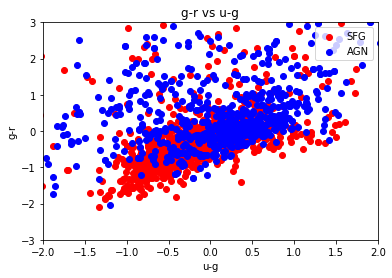

In [47]:
#For STARFORMING 
a = u_g = []
b = g_r = []

for data_point in ac:
    if data_point[-1]=='STARFORMING':
        a.append(data_point[-5])
        b.append(data_point[-4])
    else:
        pass
#For AGN
c = u_g = []
d = g_r = []

for data_point in ac:
    if data_point[-1]=='AGN':
        c.append(data_point[-5])
        d.append(data_point[-4])
    else:
        pass


plt.xlabel('u-g')
plt.ylabel('g-r')
plt.title('g-r vs u-g')
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.gca().scatter(a, b, color='red', marker='o')
plt.gca().scatter(c, d, color='blue', marker='o')
plt.gca().legend(('SFG','AGN'), loc = 'upper right', numpoints = 1)
plt.savefig('g-r_vs_u-g_for_both_SFG_&_AGN_after_classification_RF_c_only.png')
plt.show()

# r-i vs g-r for both SFG & AGN after classification

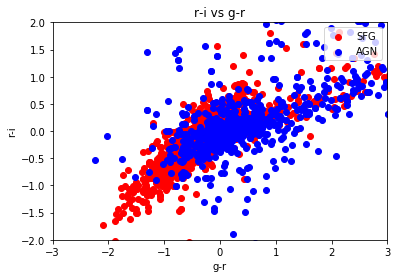

In [50]:
#For SFG
a = g_r =[]
b = r_i =[]

for data_point in ac:
    if data_point[-1]=='STARFORMING':
        a.append(data_point[-4])
        b.append(data_point[-3])
    else:
        pass

#For AGN
c = g_r =[]
d = r_i =[]

for data_point in ac:
    if data_point[-1]=='AGN':
        c.append(data_point[-4])
        d.append(data_point[-3])
    else:
        pass
    
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.title('r-i vs g-r')
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.gca().scatter(a, b, color='red', marker='o')
plt.gca().scatter(c, d, color='blue', marker='o')
plt.gca().legend(('SFG','AGN'), loc = 'upper right', numpoints = 1)
plt.savefig('r-i_vs_g-r_for_both_SFG_&_AGN_after_classification_RF_c_only.png')
plt.show()

# i-z vs r-i for both SFG & AGN after classification

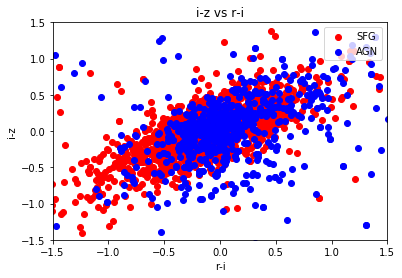

In [51]:
#For SFG
a = r_i =[]
b = i_z =[]

for data_point in ac:
    if data_point[-1]=='STARFORMING':
        a.append(data_point[-3])
        b.append(data_point[-2])
    else:
        pass

#For AGN
c = r_i =[]
d = i_z =[]

for data_point in ac:
    if data_point[-1]=='AGN':
        c.append(data_point[-3])
        d.append(data_point[-2])
    else:
        pass
    
plt.xlabel('r-i')
plt.ylabel('i-z')
plt.title('i-z vs r-i')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().scatter(a, b, color='red', marker='o')
plt.gca().scatter(c, d, color='blue', marker='o')
plt.gca().legend(('SFG','AGN'), loc = 'upper right', numpoints = 1)
plt.savefig('i-z_vs_r-i_for_both_SFG_&_AGN_after_classification_RF_c_only.png')
plt.show()

# u-g vs i-z for both SFG & AGN after classification

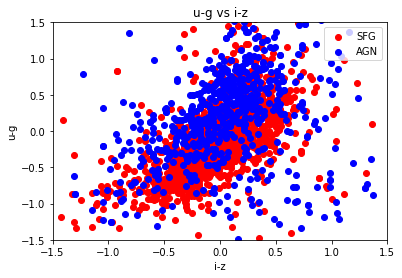

In [52]:
#For SFG
a = u_g =[]
b = i_z =[]

for data_point in ac:
    if data_point[-1]=='STARFORMING':
        a.append(data_point[-5])
        b.append(data_point[-2])
    else:
        pass

#For AGN
c = u_g =[]
d = i_z =[]

for data_point in ac:
    if data_point[-1]=='AGN':
        c.append(data_point[-5])
        d.append(data_point[-2])
    else:
        pass
    
plt.xlabel('i-z')
plt.ylabel('u-g')
plt.title('u-g vs i-z')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().scatter(b, a, color='red', marker='o')
plt.gca().scatter(d, c, color='blue', marker='o')
plt.gca().legend(('SFG','AGN'), loc = 'upper right', numpoints = 1)
plt.savefig('u-g_vs_i-z_for_both_SFG_&_AGN_after_classification_RF_c_only.png')
plt.show()

# g-r vs i-z for both SFG & AGN after classification

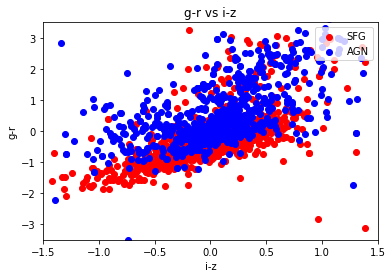

In [54]:
# For SFG
a = i_z =[]
b = g_r =[]

for data_point in ac:
    if data_point[-1]=='STARFORMING':
        a.append(data_point[-2])
        b.append(data_point[-4])
    else:
        pass

#For AGN
c = i_z =[]
d = g_r =[]

for data_point in ac:
    if data_point[-1]=='AGN':
        c.append(data_point[-2])
        d.append(data_point[-4])
    else:
        pass
    
plt.xlabel('i-z')
plt.ylabel('g-r')
plt.title('g-r vs i-z')
plt.xlim(-1.5, 1.5)
plt.ylim(-3.5, 3.5)
plt.gca().scatter(a, b, color='red', marker='o')
plt.gca().scatter(c, d, color='blue', marker='o')
plt.gca().legend(('SFG','AGN'), loc = 'upper right', numpoints = 1)
plt.savefig('g-r_vs_i-z_for_both_SFG_&_AGN_after_classification_RF_c_only.png')
plt.show()

# u-g vs r-i for both SFG & AGN after classification

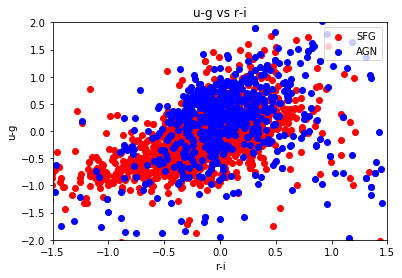

In [56]:
# For SFG
a = r_i =[]
b = u_g =[]

for data_point in ac:
    if data_point[-1]=='STARFORMING':
        a.append(data_point[-3])
        b.append(data_point[-5])
    else:
        pass

#For AGN
c = r_i =[]
d = u_g =[]

for data_point in ac:
    if data_point[-1]=='AGN':
        c.append(data_point[-3])
        d.append(data_point[-5])
    else:
        pass
    
plt.xlabel('r-i')
plt.ylabel('u-g')
plt.title('u-g vs r-i')
plt.xlim(-1.5, 1.5)
plt.ylim(-2, 2)
plt.gca().scatter(a, b, color='red', marker='o')
plt.gca().scatter(c, d, color='blue', marker='o')
plt.gca().legend(('SFG','AGN'), loc = 'upper right', numpoints = 1)
plt.savefig('u-g_vs_r-i_for_both_SFG_&_AGN_after_classification_RF_c_only.png')
plt.show()